# Texts 4 to 6: Difficulty Score Evaluation

This notebook calls the TextScorer Class (which in turn calls the TextItems class to extract vocabulary items from the specified text files, and the various Feature classes to assign feature scores) to produce a pandas dataframe of the vocabulary items in each text, their POS tags and their various feature scores. The TeacherScores class adds the aggregated teacher score for each vocabulary item to this frame.

We add a new feature score column, consisting of the overall difficulty score (using feature selection and coefficients learned from Texts 1 to 3)

The Analysis_Helper class evaluates these overall difficulty scores against the teacher difficulty scores, and contrasts them to individual feature evaluation

#### Create instances of the TextScorer class to extract vocab items, their feature scores and their teacher scores

In [1]:
from tool.TextScorer import TextScorer
from tool.TeacherScores import TeacherScores
from tool.Analysis_Helper import Analysis_Helper

In [2]:
text4 = TextScorer('files/sample_texts/text4.txt')
text4.add_all_scores()
text4_with_teacherscores=TeacherScores('text4').add_teacher_scores(text4.master_table)

text5 = TextScorer('files/sample_texts/text5.txt')
text5.add_all_scores()
text5_with_teacherscores=TeacherScores('text5').add_teacher_scores(text5.master_table)

text6 = TextScorer('files/sample_texts/text6.txt')
text6.add_all_scores()
text6_with_teacherscores=TeacherScores('text6').add_teacher_scores(text6.master_table)

In [17]:
len(text4_with_teacherscores)

297

In [21]:
#example of text 4's dataframe:
text6_with_teacherscores.drop_duplicates(subset='word_in_text', inplace=True)
text6_with_teacherscores.to_excel('text6.xlsx')

In [4]:
text4_with_teacherscores['overall_score'] = (text4_with_teacherscores['freq_score']*0.43 + 
                                             text4_with_teacherscores['l1sim_score']*0.1 +
                                             text4_with_teacherscores['POS_Score']*0.04
                                            )
text5_with_teacherscores['overall_score'] = (text5_with_teacherscores['freq_score']*0.43 + 
                                             text5_with_teacherscores['l1sim_score']*0.1 +
                                             text5_with_teacherscores['POS_Score']*0.04
                                            )
text6_with_teacherscores['overall_score'] = (text6_with_teacherscores['freq_score']*0.43 + 
                                             text6_with_teacherscores['l1sim_score']*0.1 +
                                             text6_with_teacherscores['POS_Score']*0.04
                                            )

#### Call the static methods of the Analysis class to analyse overall scores against teacher scores

Analysis of Overall Scores: Text4 overall_score against teacher scores:
Mean squared error rate is 0.07
Pearson correlation co-efficient:  0.54 and two-tailed pvalue: 0.0


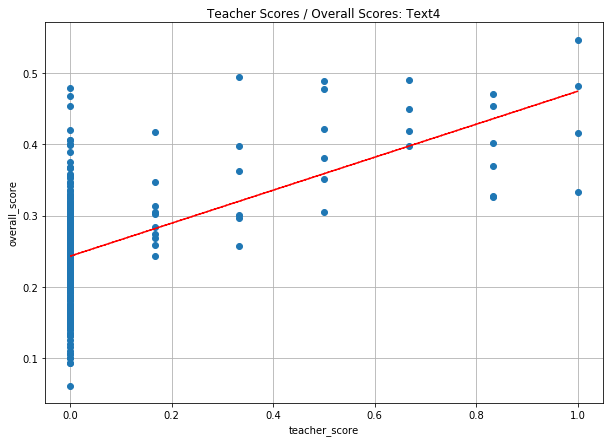

None


Analysis of Overall Scores: Text5 overall_score against teacher scores:
Mean squared error rate is 0.07
Pearson correlation co-efficient:  0.34 and two-tailed pvalue: 0.0


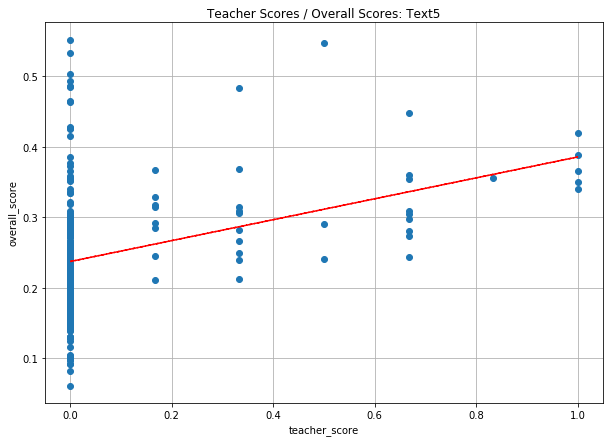

None


Analysis of Overall Scores: Text6 overall_score against teacher scores:
Mean squared error rate is 0.06
Pearson correlation co-efficient:  0.45 and two-tailed pvalue: 0.0


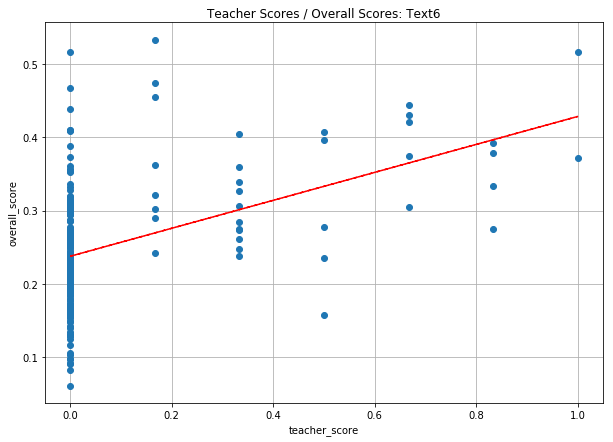

None




In [6]:
Analysis_Helper.drop_dups_get_errorrate(text4_with_teacherscores, 'overall_score', 'Overall Scores: Text4', graph='yes')
Analysis_Helper.drop_dups_get_errorrate(text5_with_teacherscores, 'overall_score', 'Overall Scores: Text5', graph='yes')
Analysis_Helper.drop_dups_get_errorrate(text6_with_teacherscores, 'overall_score', 'Overall Scores: Text6', graph='yes')

#### Call the static methods of the Analysis class to analyse L1 similarity scores against frequency scores and teacher scores

In [8]:
#### Call the static methods of the Analysis class to analyse Frequency scores against teacher scores
Analysis_Helper.drop_dups_get_errorrate(text4_with_teacherscores, 'freq_score', 'Text4')
Analysis_Helper.drop_dups_get_errorrate(text5_with_teacherscores, 'freq_score', 'Text5')
Analysis_Helper.drop_dups_get_errorrate(text6_with_teacherscores, 'freq_score', 'Text6')

Analysis of Text4 freq_score against teacher scores:
Mean squared error rate is 0.16
Pearson correlation co-efficient:  0.49 and two-tailed pvalue: 0.0


Analysis of Text5 freq_score against teacher scores:
Mean squared error rate is 0.16
Pearson correlation co-efficient:  0.37 and two-tailed pvalue: 0.0


Analysis of Text6 freq_score against teacher scores:
Mean squared error rate is 0.17
Pearson correlation co-efficient:  0.42 and two-tailed pvalue: 0.0




In [7]:
#### Call the static methods of the Analysis class to analyse L1similarity scores against teacher scores
Analysis_Helper.drop_dups_get_errorrate(text4_with_teacherscores, 'l1sim_score', 'Text4')
Analysis_Helper.drop_dups_get_errorrate(text5_with_teacherscores, 'l1sim_score', 'Text5')
Analysis_Helper.drop_dups_get_errorrate(text6_with_teacherscores, 'l1sim_score', 'Text6')

Analysis of Text4 l1sim_score against teacher scores:
Mean squared error rate is 0.35
Pearson correlation co-efficient:  0.24 and two-tailed pvalue: 0.0


Analysis of Text5 l1sim_score against teacher scores:
Mean squared error rate is 0.36
Pearson correlation co-efficient:  -0.02 and two-tailed pvalue: 0.7


Analysis of Text6 l1sim_score against teacher scores:
Mean squared error rate is 0.3
Pearson correlation co-efficient:  0.13 and two-tailed pvalue: 0.05


